In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import re
from typing import Dict, List, Text

stocks: Dict[Text, List] = {}
with open("data.csv", "r") as file:
    content = file.read()
    words = content.split()
    stock_name_match = re.compile(r"[a-zA-Z]+")
    current_stock_name = None
    for w in words:
        if stock_name_match.match(w):
            current_stock_name = w
            stocks[current_stock_name] = []
        else:
            stocks[current_stock_name].append(float(w))
        
        

In [5]:
import pandas as pd
stocks_df = pd.DataFrame(stocks).reset_index(names=['day'])

In [6]:
stocks_df.describe()

,day,CAL,UCB,RIT,UCLA,UCSC,UFL,UMAD,RICE,UMD
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,252.000000,124.338832,63.462792,285.382931,17.651644,194.259248,57.165228,125.763762,124.127089,80.063663
std,145.925209,3.799999,8.059884,266.551524,9.302346,23.242236,9.578271,15.095942,3.949814,10.688499
min,0.000000,116.880000,47.530000,99.330000,1.860000,155.000000,19.770000,96.210000,116.850000,58.780000
25%,126.000000,121.280000,57.350000,131.180000,9.430000,173.730000,58.560000,113.560000,120.850000,71.920000
50%,252.000000,124.150000,63.880000,184.520000,17.510000,193.280000,60.690000,124.710000,124.080000,77.850000
75%,378.000000,127.400000,69.420000,288.360000,25.660000,211.000000,62.710000,139.180000,127.210000,87.650000
max,504.000000,134.310000,81.290000,1440.750000,35.790000,249.820000,65.080000,154.920000,136.260000,104.750000


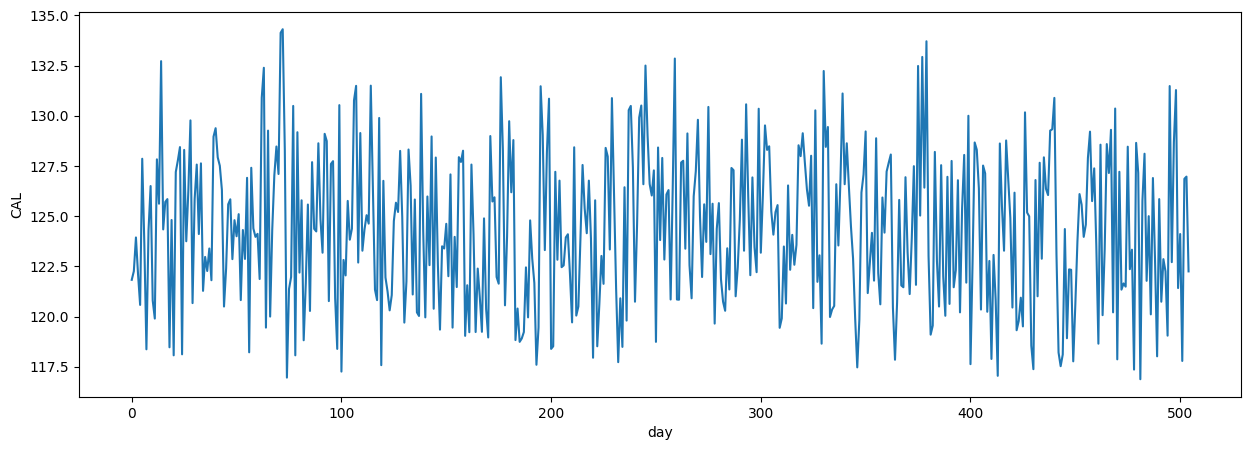

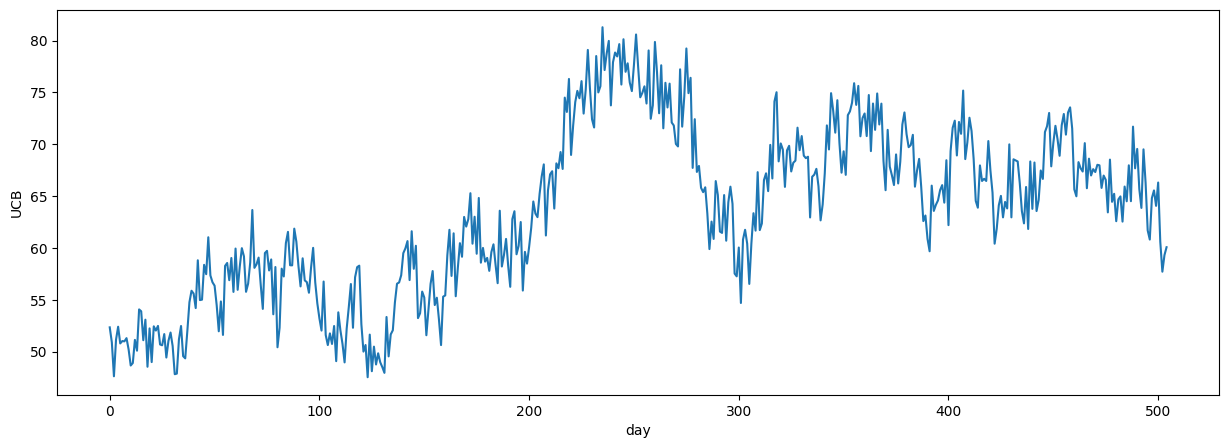

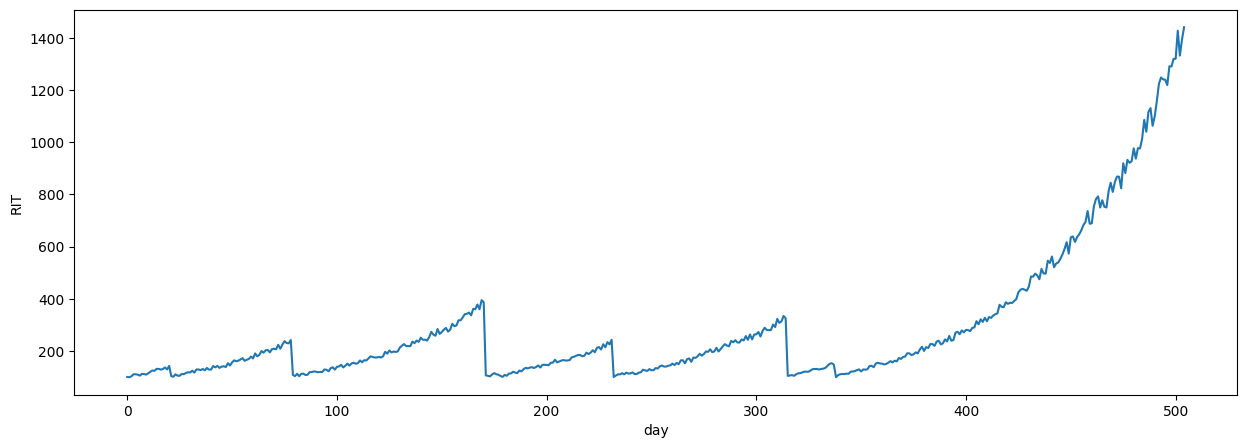

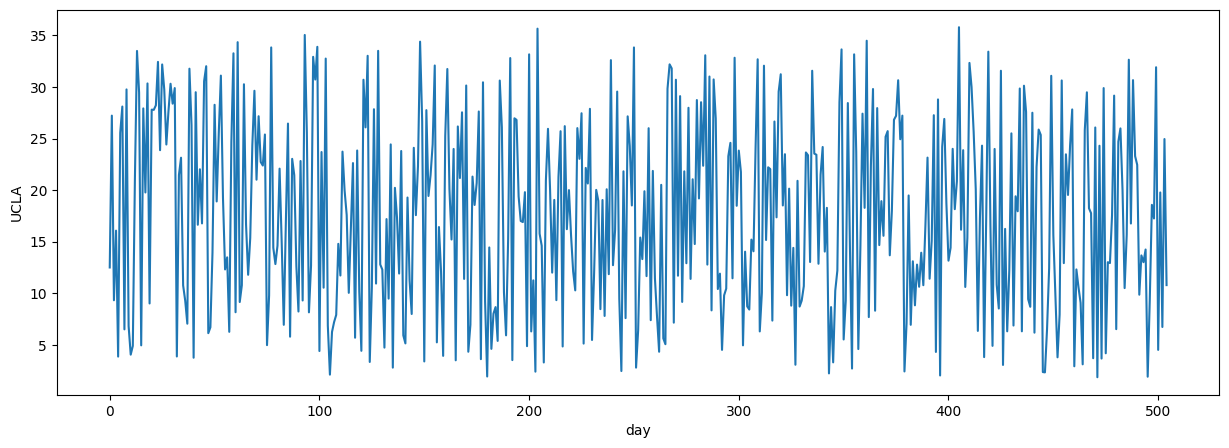

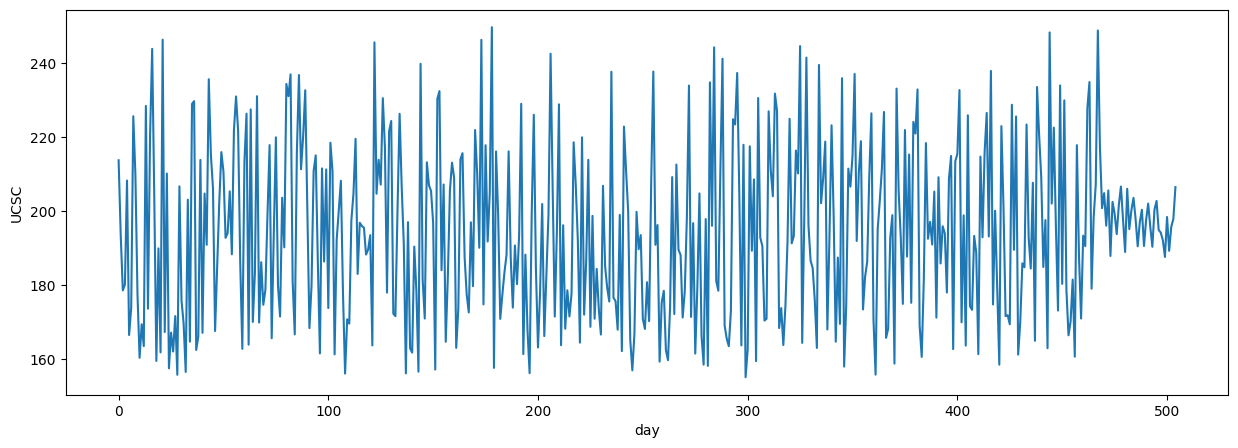

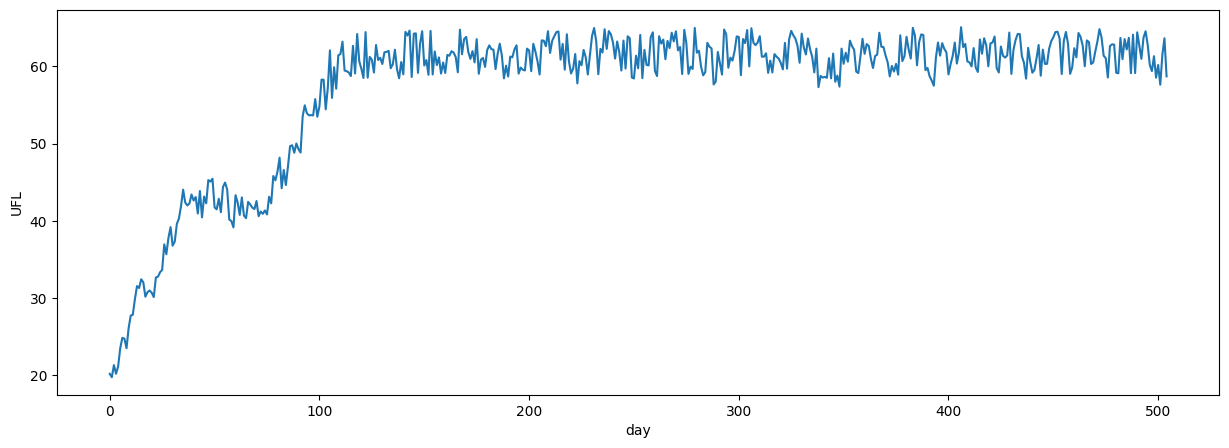

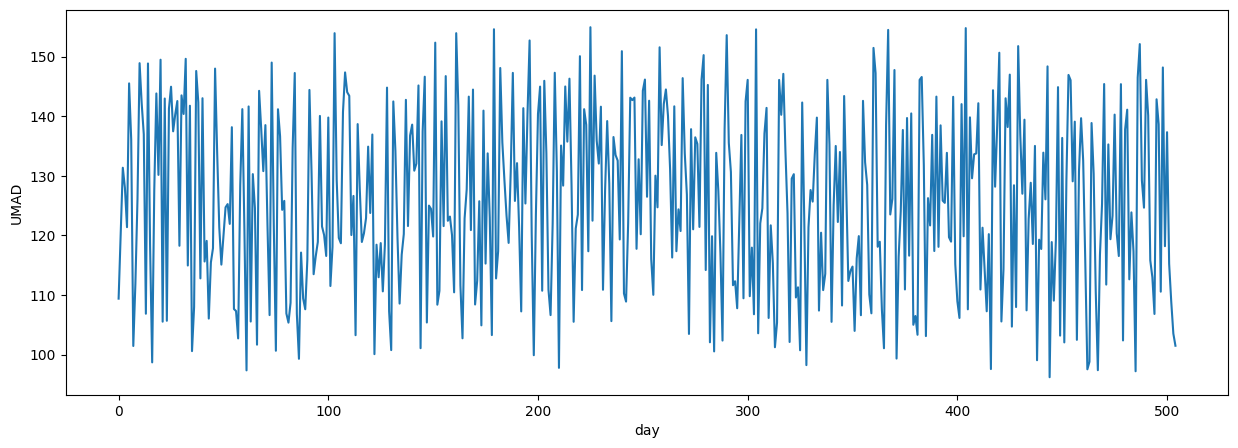

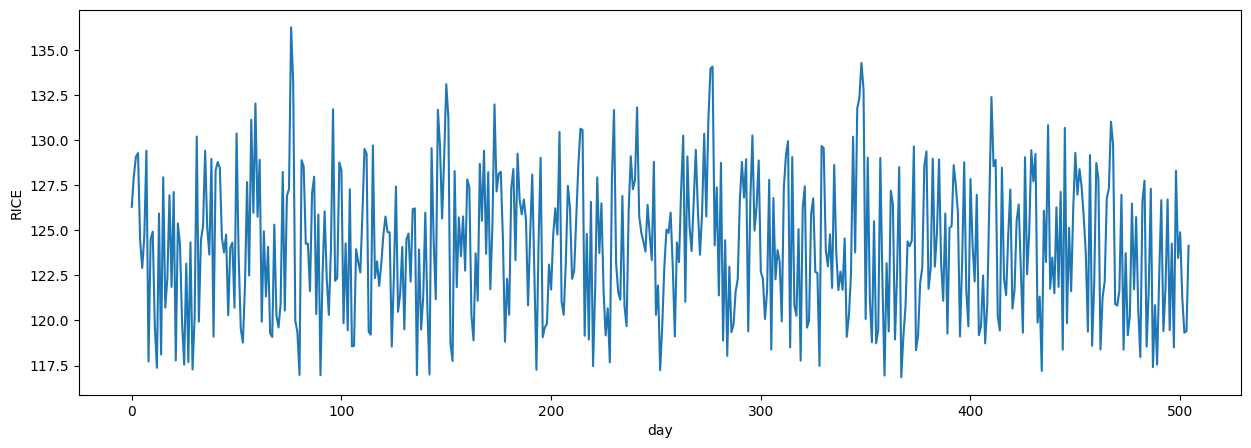

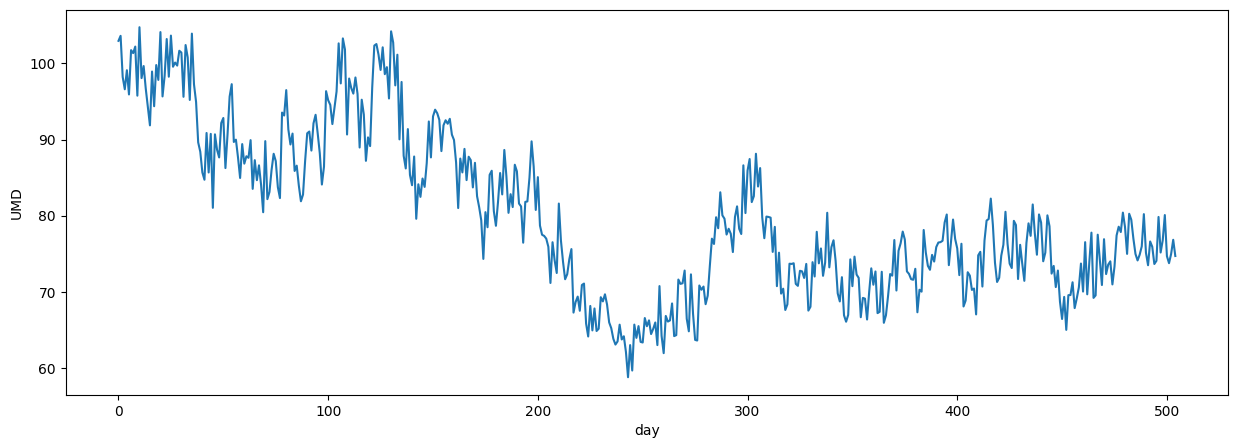

In [7]:
for stock in stocks_df.drop(columns=['day']).columns:
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=stocks_df, x='day', y=stock)

In [8]:
import numpy as np
from numpy.linalg import lstsq
from  numpy.typing import NDArray 
class exponentialAverage():
    def __init__(self, alpha: float):
        self.alpha = alpha
        self.data: NDArray = None
    
    def fit(self, data: NDArray):
        if self.data is not None:
            self.data = np.hstack([self.data, data])
        else:
            self.data = data
    
    def predict(self):
        weights = np.array([self.alpha*(1-self.alpha)**i for i in range(0, len(self.data))])
        prediction = np.dot(np.flip(self.data), weights)
        return prediction

class linearModel():
    def __init__(self, window):
        self.data: NDArray = None
        self.window = window
    
    def fit(self, data: NDArray):
        if self.data is not None:
            self.data = np.hstack([self.data, data])
        else:
            self.data = data
    
    def predict(self):
        window_data = self.data[-self.window:]
        x = np.array(range(1, len(window_data) + 1))
        A = np.vstack([x, np.ones(len(x))]).T
        a, b = lstsq(A, window_data, rcond=None)[0]
        
        prediction = b + a*(len(window_data) + 1)
        return prediction

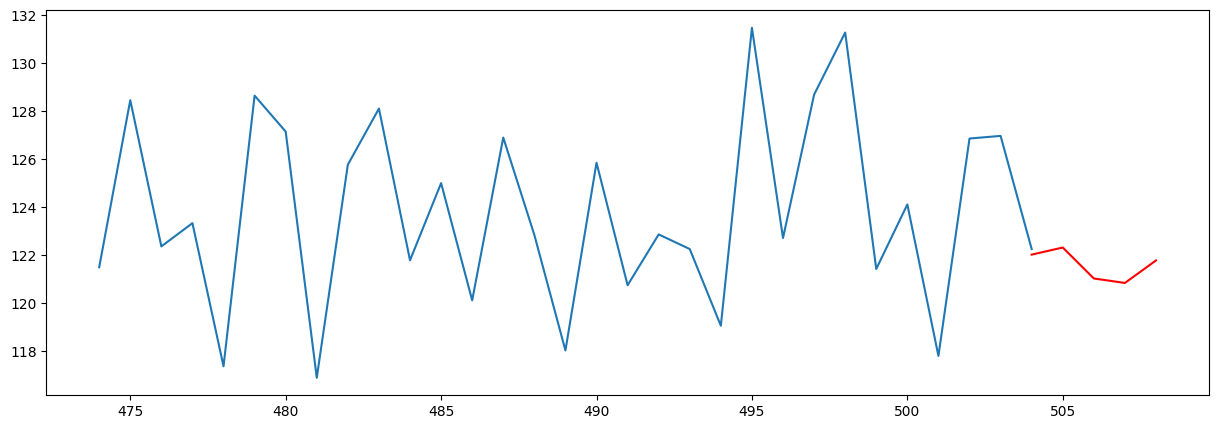

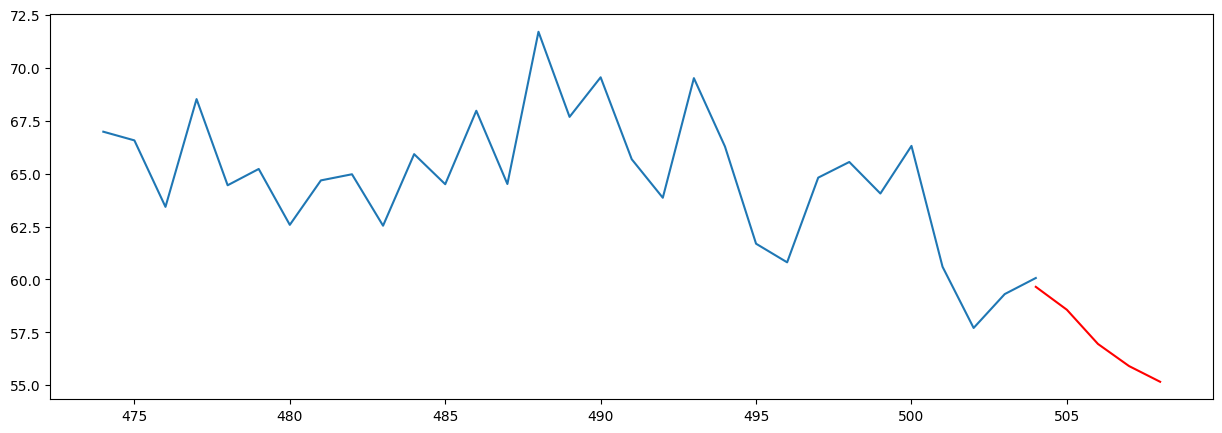

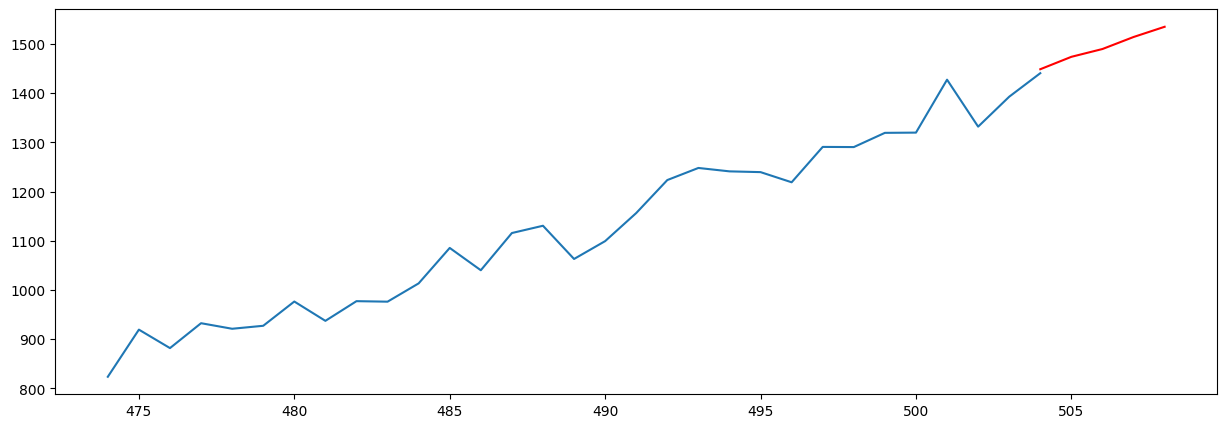

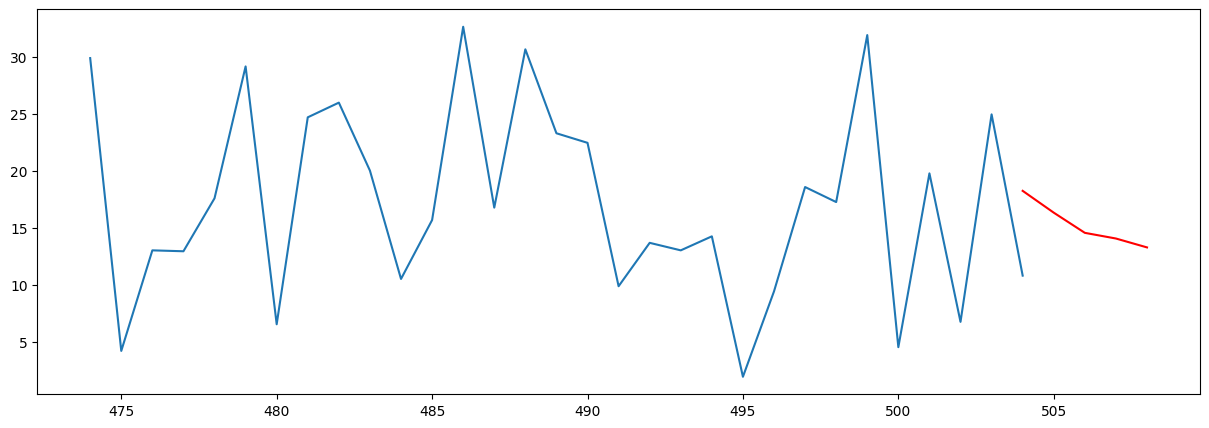

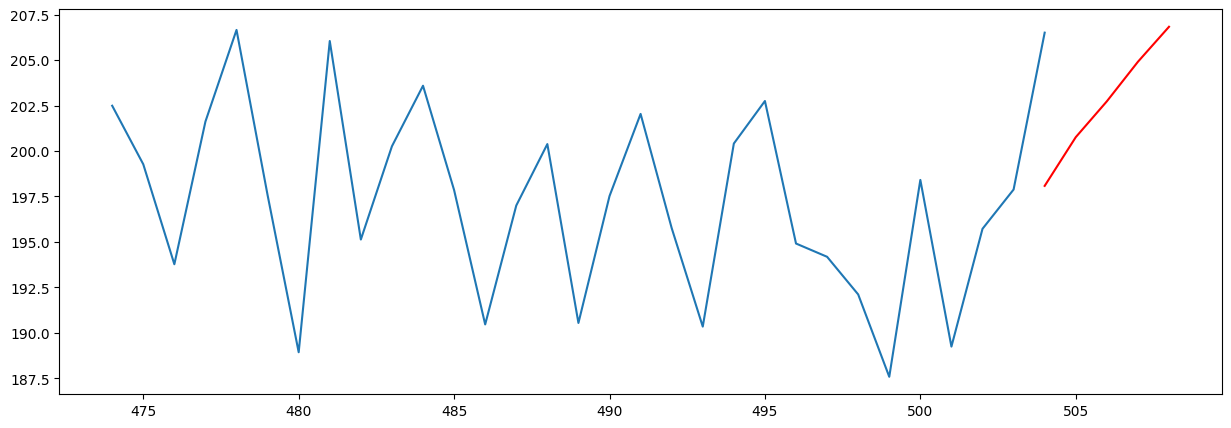

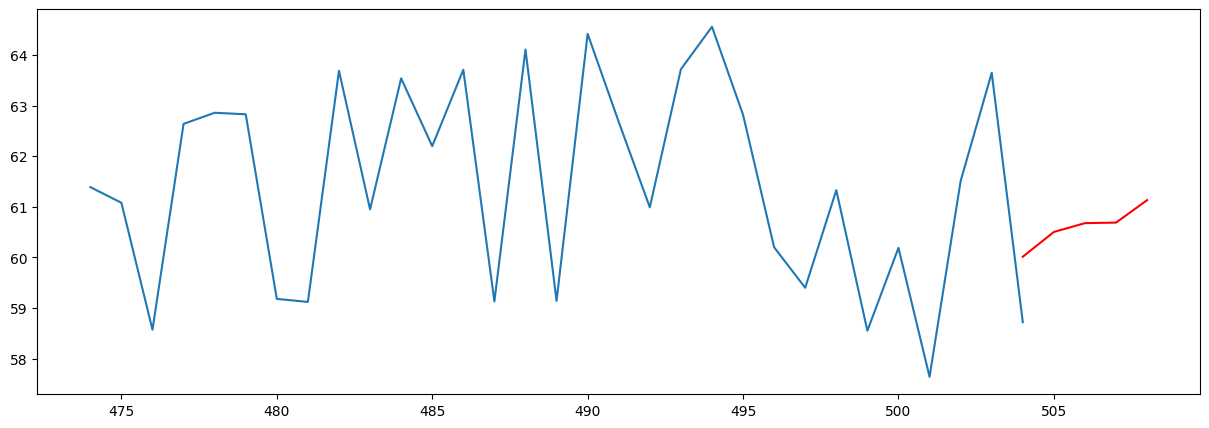

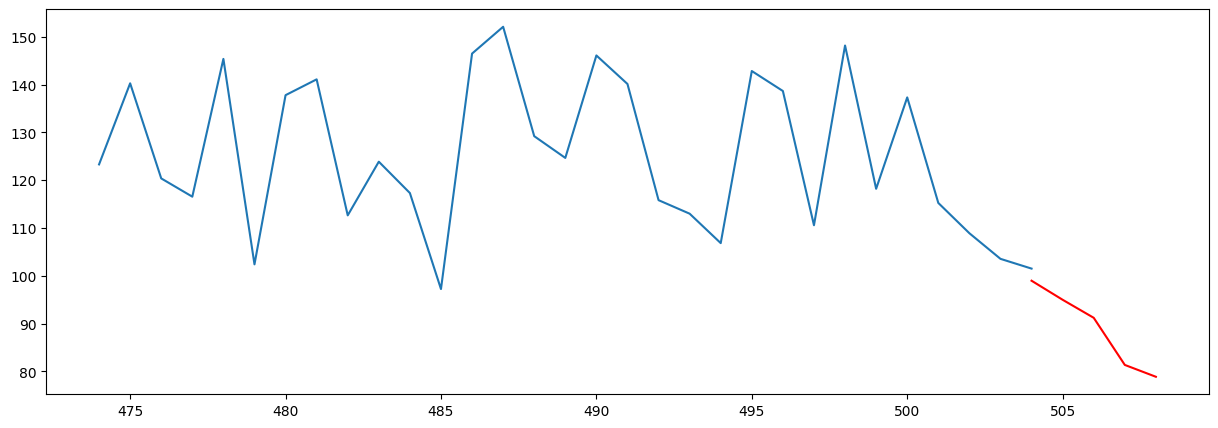

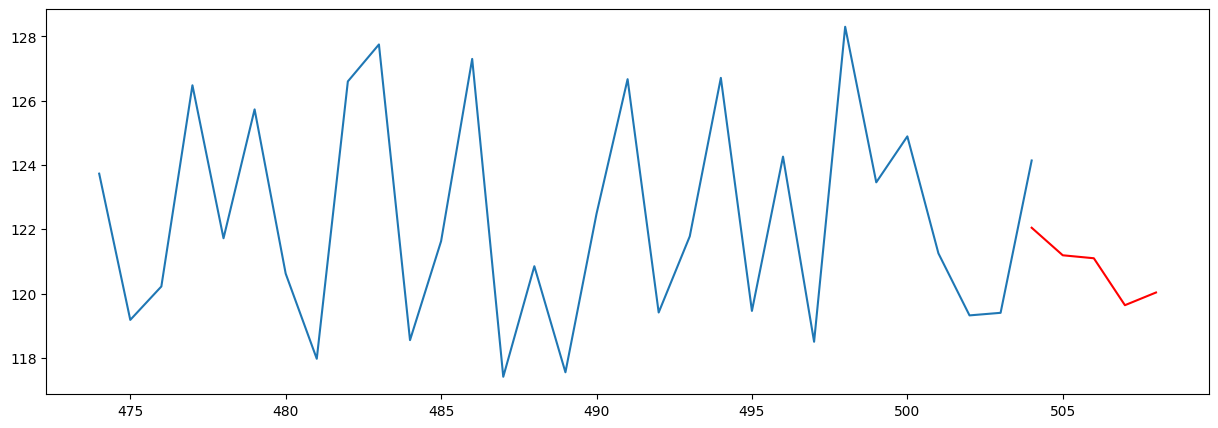

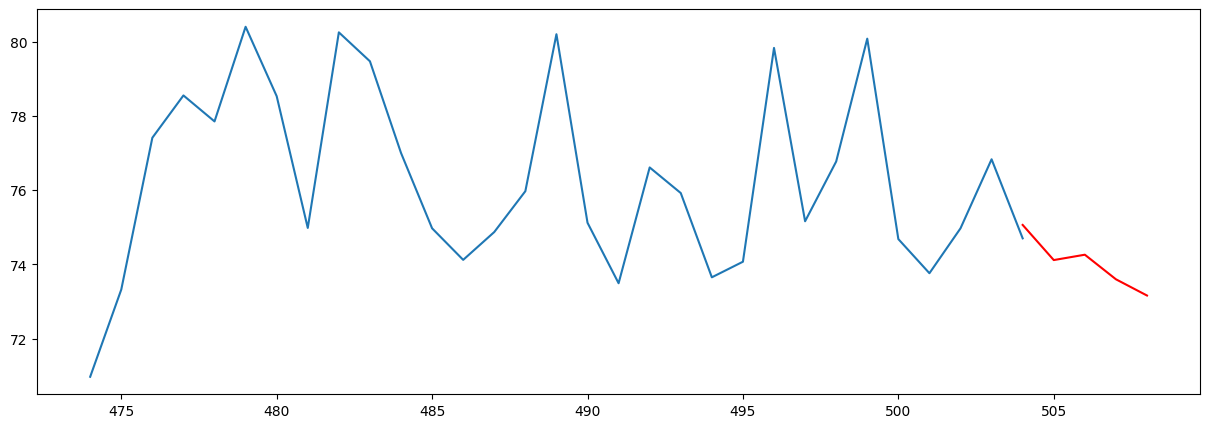

In [9]:
window= 30
prediction_steps=5
for stock in stocks_df.drop(columns=['day']).columns:
    last_day = stocks_df.loc[:, 'day'].values[-1]
    window_data = stocks_df.loc[lambda x: x['day']>=last_day-window, [stock, 'day']] 
    model= linearModel(10)
    model.fit(window_data.loc[:, stock].to_numpy())
    predictions = []
    for step in range(prediction_steps):
        future = model.predict()
        predictions.append(future)
        model.fit(future)
    plt.figure(figsize=(15, 5))
    plt.plot(window_data['day'], window_data[stock])
    plt.plot(range(last_day, last_day+prediction_steps), predictions, color='r');

Complete the function printTransactions that takes a float m money left, an integer k number of stocks, an integer d days left, a string array name of stock names, an integer array owned of stocks owned, and an 2d integer array prices of stock prices containing k arrays of length 5 and print your output.

All indexes correspond properly (For index i, the name of the stock is name[i], the number of shares of it you hold is owned[i] and the data about it is prices[i].

example input:

100 10 20
CAL 0 121.83 122.26 123.94 122.11 120.58
UCB 0 52.34 50.89 47.62 51.16 52.4
RIT 0 100.21 99.33 102.87 110.63 110.72
UCLA 0 12.5 27.22 9.32 16.07 3.86
USC 0 249.58 244.24 242.56 245.13 245.35
UFL 0 20.21 19.77 21.34 20.21 21.17
UMAD 0 109.39 120.49 131.35 127.97 121.38
RICE 0 126.3 128 129.08 129.28 124.44
UMD 0 102.96 103.62 98.22 96.6 99.1
UCSC 0 213.77 193.51 178.53 180.08 208.29

In [81]:
from typing import List

def printTransaction(
    m: float, # money left
    k: int, # numer of stocks
    d: int, # days left
    stock_names: List[str],
    stock_owned: List[int],
    stock_prices:List[List[float]] # last 5 days of stock prices
):
    # prediction for each stock
    for stock_name, stock_price in zip(stock_names, stock_prices):
        model = linearModel(10)
        model.fit(stock_price)
        prediction = model.predict()
        print(f"Prediction for {stock_name} is {prediction}")

In [ ]:

from typing import List

class linearModel():
    def __init__(self, window):
        self.data = None
        self.window = window
    
    def fit(self, data):
        if self.data is not None:
            self.data = np.hstack([self.data, data])
        else:
            self.data = data
    
    def predict(self):
        window_data = self.data[-self.window:]
        x = np.array(range(1, len(window_data) + 1))
        n = len(window_data)
        sum_y = sum(window_data)
        sum_x = sum(x)
        sum_x_y = sum([_x*y for _x,y in zip(x, window_data)])
        sum_x_sum_y = sum(x)*sum(y)
        sum_x_sq = sum([x_*x_ for x_ in x])
        sq_sum_x = sum(x)*sum(x)
        D = (n*sum_x_sq - sq_sum_x)
        
        a = (n*sum_x_y - sum_x_sum_y)/D
        
        b = (sum_y*sum_x_sq - sum_x*sum_x_y)/D
        
        prediction = b + a*(len(window_data) + 1)
        return prediction

    
def printTransaction(
    m: float, # money left
    k: int, # numer of stocks
    d: int, # days left
    stock_names: List[str],
    stock_owned: List[int],
    stock_prices:List[List[float]] # last 5 days of stock prices
):
    # prediction for each stock
    for stock_name, stock_price in zip(stock_names, stock_prices):
        model = linearModel(10)
        model.fit(stock_price)
        prediction = model.predict()
        print(f"Prediction for {stock_name} is {prediction}")

if __name__ == '__main__':
    first_line = input()
    m, k, d = [int(v) for v in first_line.split()]
    stock_names = []
    stock_owned = []
    stock_prices = []
    for line in range(k):
        splitted = input().strip().split()
        stock_names.append(splitted[0])
        stock_owned.append(splitted[1])
        stock_prices.append(splitted[2:])
    printTransaction(m,k,d,stock_names,stock_owned,stock_prices)